# Essence of linear algebra
## Chapter 14
### Eigenvectors and eigenvalues 

https://www.youtube.com/watch?v=PFDu9oVAE-g&t=900s

Home page: https://www.3blue1brown.com/
A visual understanding of eigenvectors, eigenvalues, and the usefulness of an eigenbasis.
Full series: https://3b1b.co/eola


### Eigenvectors and Eigenbases. 

Let $A$ be an $n × n$ matrix.


Recall that a nonzero vector $\vec v$ is an eigenvector for $A$ with eigenvalue 
$λ$ if

$A \vec v = λ \vec  v$

An eigenbasis is a basis of $R^{n}$ consisting of eigenvectors of A.


**Eigenvectors and Linear Independence.**
Eigenvectors with different eigenvalues are automatically linearly
independent.

If an $n × n$ matrix $A$ has n distinct eigenvalues then it has an eigenbasis.

**Eigenspaces**
If $A$ is an $n × n$ matrix and λ is a scalar, the λ-eigenspace of A (usually denoted Eλ) is the set of all vectors $\vec v$ in $R^{n}$   so that 

$ A \vec v = λ\vec v$

The non-zero vectors in Eλ are exactly the eigenvectors of A with eigenvalue λ.



[https://brilliant.org/wiki/linear-transformations/](https://brilliant.org/wiki/linear-transformations/)

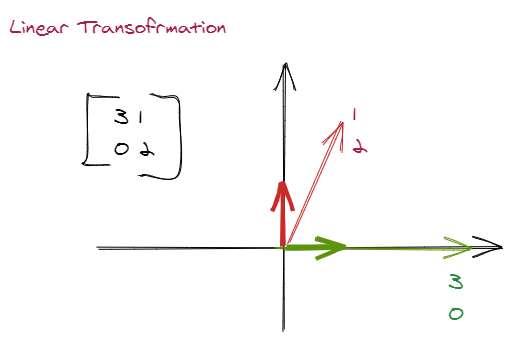

In [2]:
import numpy as np
import math
T = np.array([[3,1],[0,2]])

x = np.array([-1,1])
def get_angle(p):
    return math.atan2(p[1],p[0])/math.pi*180
def get_len(p):
    return np.sqrt(np.sum(np.power(p,2)))
print('Vector | Scale | Rotate |')
eigens = []
for x in [ [0,1],[1,0],[0,3],[3,0],[-1,1],[1,-1],[5,2],[7,4]]:
    prod = np.dot(T,x)
    ax  = get_angle(x)    
    ap =  get_angle(prod)
    lx = get_len(x);
    lp = get_len(prod);
    print(f'{str(x)} : {lx/lp:03.2f}  : {ax-ap:03.2f}')
    if ax==ap:
        eigens.append([x,lx/lp])
print('\n\nEigen Vector and E.Value:')
for e in eigens:
    print(f'{e[0]}  {e[1]:.2f}')

Vector | Scale | Rotate |
[0, 1] : 0.45  : 26.57
[1, 0] : 0.33  : 0.00
[0, 3] : 0.45  : 26.57
[3, 0] : 0.33  : 0.00
[-1, 1] : 0.50  : 0.00
[1, -1] : 0.50  : 0.00
[5, 2] : 0.31  : 8.56
[7, 4] : 0.31  : 12.00


Eigen Vector and E.Value:
[1, 0]  0.33
[3, 0]  0.33
[-1, 1]  0.50
[1, -1]  0.50


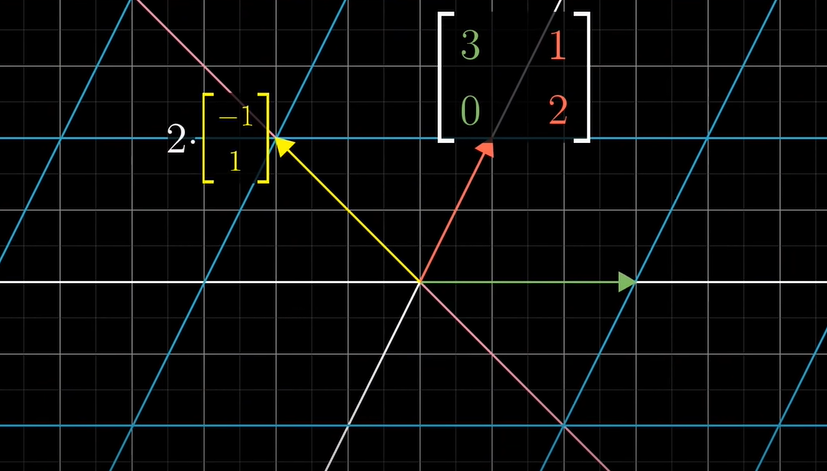

$$\underbrace{ A \vec v}_\text{Matrix Vector multiplication}= \underbrace{ \lambda\vec v}_\text{Scalar multiplication}$$

$$ A \vec v = \lambda \vec v = \lambda \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \vec v = \lambda I \vec v $$

$$ (A - \lambda I) \vec v = \vec 0 $$

$$ (A - \lambda I) 	\rightarrow \ \begin{bmatrix} a_{00}-\lambda, 5 , 5 \\ 2, 5-\lambda, 7 \\ 3,4,2-\lambda \end{bmatrix} $$


$\vec v$ - non-zero vector, the only way is that transformation associated with this matrix $A$ squishes space into lower dimension 

$$det(A - \lambda I)=0$$

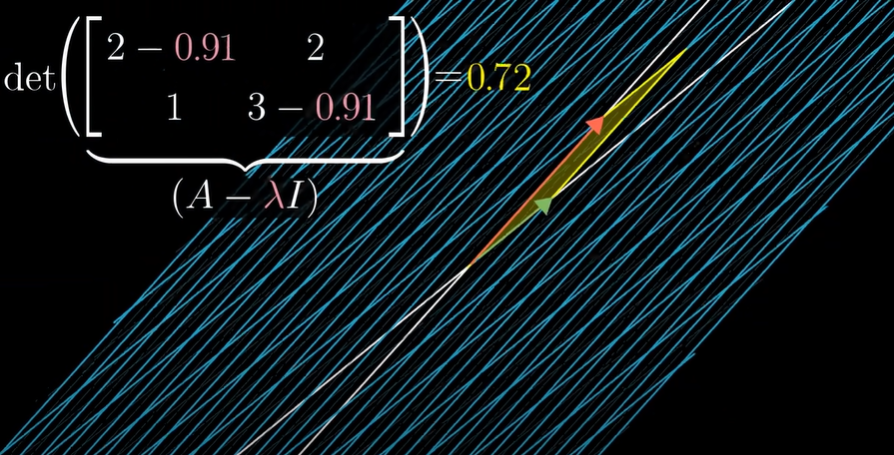

[[2 2]
 [1 3]]


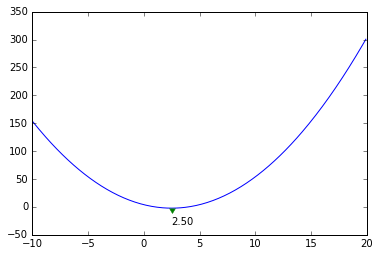

In [8]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

A = np.array([[2,2],[1,3]])
print(A)
X=np.arange(-10,20,0.1)
y=[]
for lmb in X:
    y.append(np.linalg.det(A - (np.eye(2)*lmb)))
m=np.argmin(y)
plt.plot(X, y)
plt.plot(X[m],y[m],marker=11,label="toto" )
plt.text(X[m],np.min(y)-30, f'{X[m]:2.2f}');


## Eigenbasis

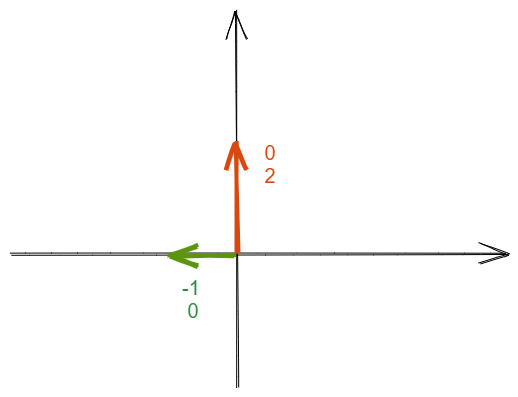

In [74]:
A = np.array([[-1, 0],
              [ 0, 2]])

x = np.array([1,1])
for i in  range(5):
    x = np.dot(A,x)
    print(x)

[-1  2]
[1 4]
[-1  8]
[ 1 16]
[-1 32]


In [85]:
T = np.array([ [3,1],
               [0,2] ])
eigens = np.array([[1, 0],[-1, 1]]).T

print('Change of basis matrix')
print(eigens)

print('Guaranteed to be diagonale')
diag_matrix = np.dot( np.dot(np.linalg.inv(eigens),T),        eigens)
print(diag_matrix)

Change of basis matrix
[[ 1 -1]
 [ 0  1]]
Guaranteed to be diagonale
[[3. 0.]
 [0. 2.]]


https://canvas.harvard.edu/files/3780067/download?download_frd=1&verifier=hNHLukPIpGtkoApu6WIE51qatsQV7VNvCCak7jwW



## Assignment


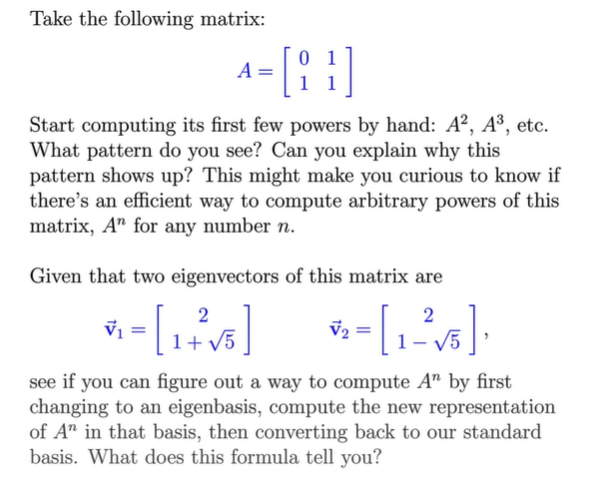

[From SO](https://math.stackexchange.com/questions/27692/how-can-i-find-the-nth-exponent-of-the-matrix-using-the-diagonalization-algorithm)

Given matrix $A$ and matrix $S$ of eigen vectors $v1$ and $v2$ 

Find diagonal matrix $D$ of corresponding eigenvalues

$D=S^{−1}  A S$

Represent $A$ as

$ A=SDS^{−1}$ 

Now

$A^{n} = \underbrace{(SDS^{−1})(SDS^{−1})...(SDS^{−1})}_\text{N}$

all $SS^{−1}$ besides the ones on the very left and very right will cancel due to 

$S^{−1}S=I$

So

$A^{n} = SD^{N}S^{−1}$

And $D^{N}$ is an element-wise power of diagonal elements




In [167]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)


A = np.array( [ [0,1],
                [1,1] ])

print('Matrix A')
print(A)
v1 = [ 2, 1+ np.sqrt(5) ]
v2 = [ 2, 1- np.sqrt(5) ]
S   = np.array([v1,v2]).T
print('\n\nGiven Matrix S of eigen vectors:')
print(S)

iS = np.linalg.inv(S)
print('\n\nInverse Matrix iS:')
print(iS)

#Find diagonal matrix $D$ of corresponding eigenvalues
D = np.dot( np.dot(iS,A),S)

print('\n\nDiagonal Matrix D:')
print(D)

print('\n Make Sure that A = S * D * iS')
A_prim = np.dot( np.dot( S,D),iS)
print(A_prim)

K=10;

print('\n\nBrute Force Power of A')
Ak=A;
for i in range(K-1):
    Ak = np.dot(Ak,A)
print(Ak)

print('\nQuck Power of A')

D_k = np.power(D,K)
Ak_fast = np.dot( np.dot(S,D_k),iS)

with np.printoptions(precision=3, suppress=True):
    print(Ak_fast)
    

Matrix A
[[0 1]
 [1 1]]


Given Matrix S of eigen vectors:
[[ 2.    2.  ]
 [ 3.24 -1.24]]


Inverse Matrix iS:
[[ 0.14  0.22]
 [ 0.36 -0.22]]


Diagonal Matrix D:
[[ 1.62 -0.  ]
 [ 0.   -0.62]]

 Make Sure that A = S * D * iS
[[-0.  1.]
 [ 1.  1.]]


Brute Force Power of A
[[34 55]
 [55 89]]

Quck Power of A
[[34. 55.]
 [55. 89.]]


## Vadim / Slavik

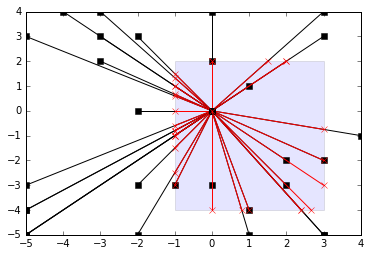

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.path import Path

lim_p = np.array([ 3 ,  2])
lim_n = np.array([-1 , -4])

r     = np.array([3,5])
def crop(r):
    r_ratio_p = r/lim_p
    r_ratio_n = r/lim_n
    s = np.max([r_ratio_p,r_ratio_n])

        
    return r/s

left, bottom  = lim_n[0],lim_n[1]
width, height = lim_p[0]-lim_n[0],lim_p[1]-lim_n[1]
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="blue", alpha=0.1)
fig, ax = plt.subplots()
ax.add_patch(rect)
bbox = Bbox.from_bounds(left, bottom, width, height)
L = 30
r_arr = np.random.randint(low=-5, high=5, size=(L, 2))
for r in r_arr:
    ax.plot( [0,r[0]],[0,r[1]],marker='s',color='black')
    c = crop(r)
    ax.plot( [0,c[0]],[0,c[1]],marker='x',color='red')

plt.show()